# Seaborn. Основы

Seaborn — это библиотека для создания статистических графиков на Python. Она основывается на matplotlib и тесно взаимодействует со структурами данных pandas.

Архитектура Seaborn позволяет вам быстро изучить и понять свои данные. Seaborn захватывает целые фреймы данных или массивы, в которых содержатся все ваши данные, и выполняет все внутренние функции, нужные для семантического маппинга и статистической агрегации для преобразования данных в информативные графики.

Она абстрагирует сложность, позволяя вам проектировать графики в соответствии с вашими нуждами.

## Установка Seaborn

На MacOS и Linux достаточно ввести комманду:
```shell
pip install seaborn
```

На Windows могут возникнуть неторые проблемы с установкой через `pip`. Попробуйте сначала установить библиотеку способом для MacOS и Linux. Если во время установки возникают ошибки, установите [Anaconda](https://www.anaconda.com/products/individual) и, используя Anaconda, установите Seaborn. 

## Начало работы

Вспомним, как мы взаимойствуем с matplotlib:

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter, AutoDateLocator

In [2]:
dataset_link = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-28/grosses.csv'
df = pd.read_csv(dataset_link)

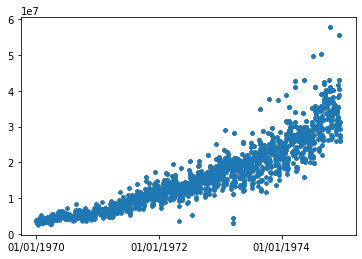

In [3]:
fig, ax = plt.subplots()
ax.scatter(df['week_ending'], df['weekly_gross_overall'], s=9, alpha=.2)
locator = AutoDateLocator(maxticks=5)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(DateFormatter('%d/%m/%Y'))
plt.show()

Теперь импортируем seaborn. Перед тем, как мы начнем строить графики, нам нужны данные. Прелесть seaborn в том, что он работает непосредственно с объектами dataframe из pandas, что делает ее очень удобной. Более того, библиотека поставляется с некоторыми встроенными наборами данных, которые можно использовать прямо из кода, и не загружать файлы вручную.

Вот датасеты, которые использует seaborn "из коробки": https://github.com/mwaskom/seaborn-data.


Импортируем билиотеку и загружаем один из предустановленых датасетов:

In [1]:
import seaborn as sns

sns.set() #- проексперементируйте: с этим методом и без него

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Мы загрузили данные про вот такие вот ирисы: 
![](https://i.imgur.com/PQqYGaW.png)

Давайте проанализируем наши данные и начнем с анализа колличества данных по каждому виду:

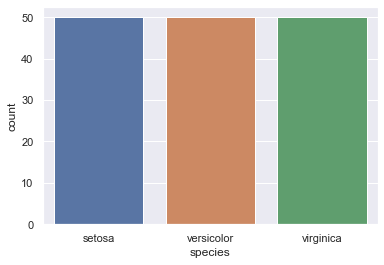

In [4]:
sns.countplot(x=iris.species)
plt.show()

Из столпчатого графика видно, что колличество данных по каждому виду поравно. 

`sns.countplot` - оторажает количество повторений с помощью столбцов по каждой категории, исходя их данных в ячейках.

## displot

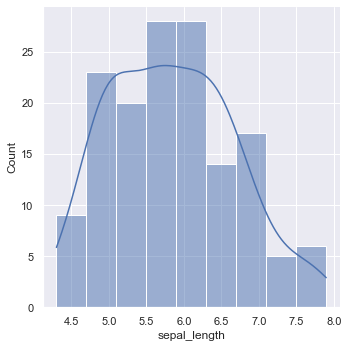

In [5]:
sns.displot(x=iris.sepal_length, kde=True)
plt.show()

Функция `sns.displot` обеспечивает доступ к нескольким подходам для визуализации одномерного или двумерного распределения данных, включая подмножества данных, определенных семантическим отображением и фасетированием по множеству подзаголовков.

**Термин вне анализа**: Фацетировать - опиливать подпилком края и углы пластинки для изготовления офорта (разновидность печатной графики, гравюры на металле).

Функция `sns.kdeplot` позволяет сделать отображение данных, используя ядерное сглаживание для оценки плотности. 

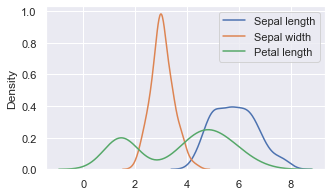

In [11]:
plt.subplots(figsize=(5, 3))
sns.kdeplot(iris.sepal_length, label='Sepal length')
sns.kdeplot(iris.sepal_width, label='Sepal width')
sns.kdeplot(iris.petal_length, label='Petal length')
plt.xlabel('')
plt.legend()
plt.show()

## Построение box plot

Для создания диаграммы воспользуемся функцией boxplot в Seaborn, которой в качестве аргументов передадим переменные для визуализации:

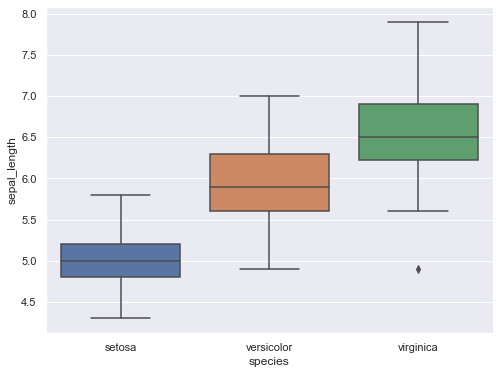

In [12]:
plt.subplots(figsize=(8, 6))
sns.boxplot(data=iris, x='species', y='sepal_length')
plt.show()

In [14]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


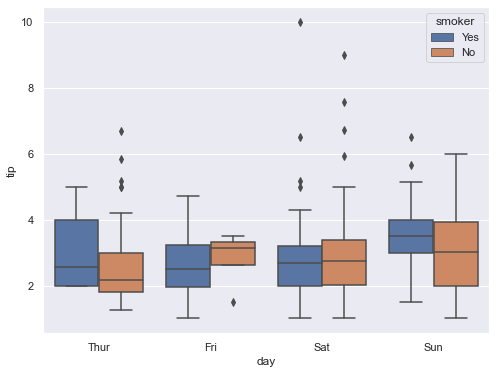

In [16]:
plt.subplots(figsize=(8, 6))
sns.boxplot(data=tips, x='day', y='tip', hue='smoker')
plt.show()

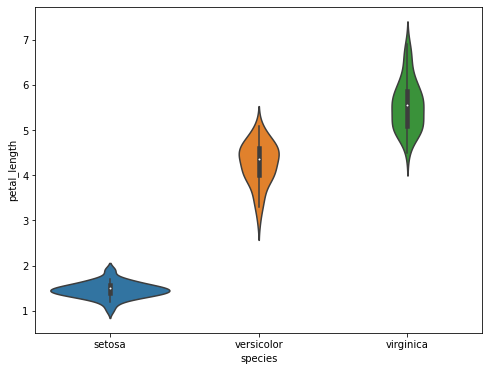

In [12]:
plt.subplots(figsize=(8, 6))
sns.violinplot(data=iris, x='species', y='petal_length')
plt.show()

![](https://datavizcatalogue.com/RU/metody/images/anatomy/SVG/skripicnyj_grafik.svg)

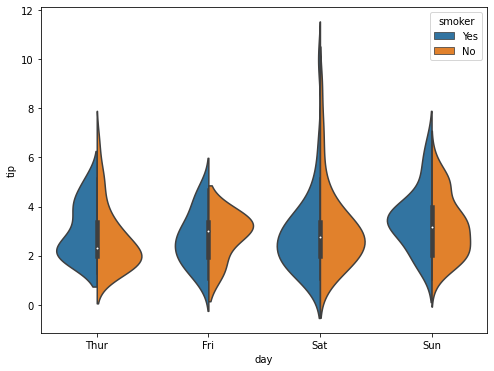

In [13]:
plt.subplots(figsize=(8, 6))
sns.violinplot(data=tips, x='day', y='tip', hue='smoker', split=True)
plt.show()

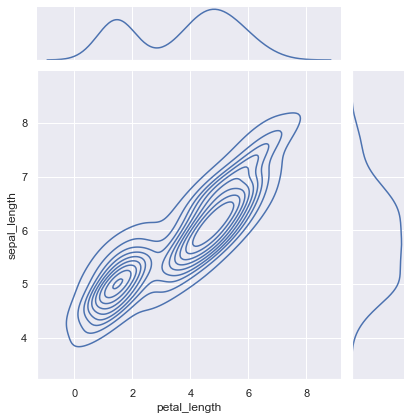

In [17]:
sns.jointplot(data=iris, x='petal_length', y='sepal_length', kind='kde')

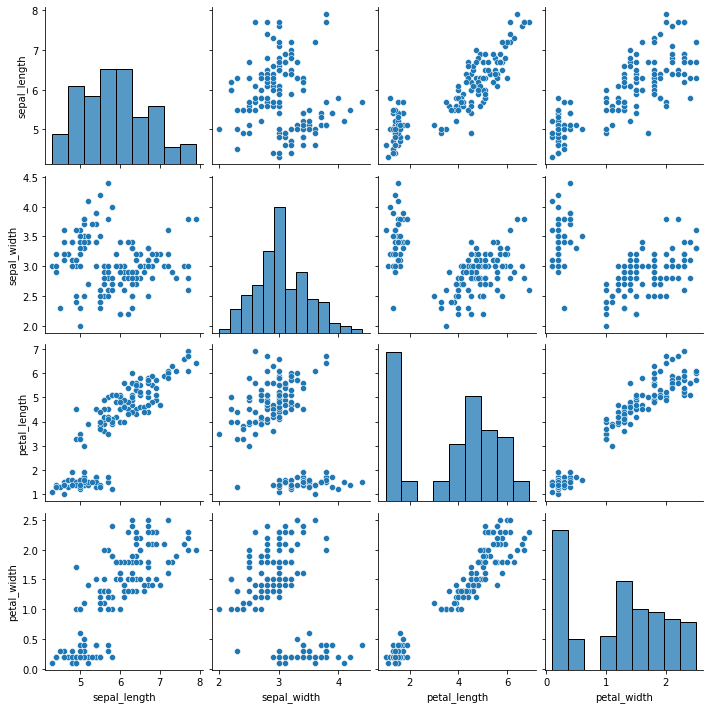

In [15]:
sns.pairplot(iris)

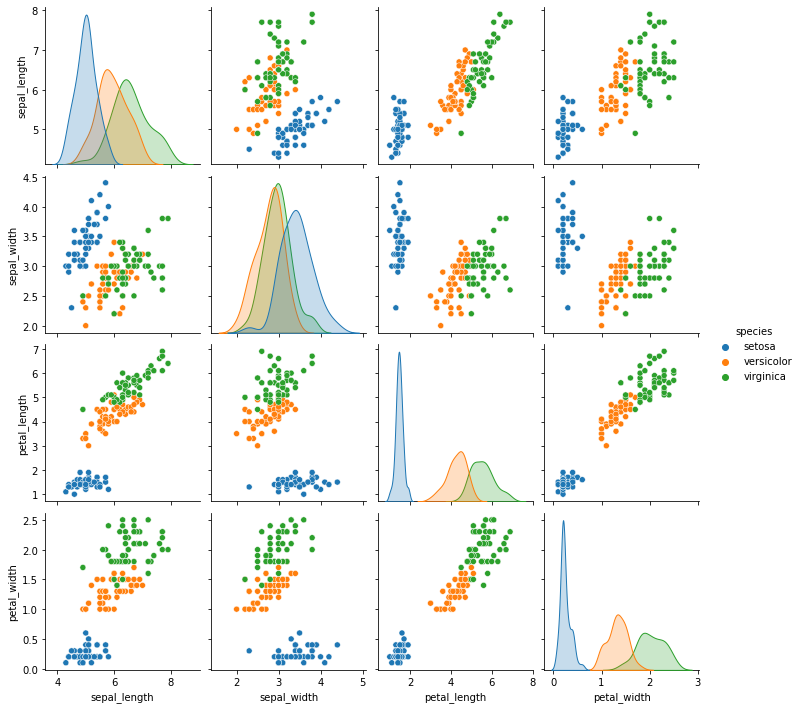

In [16]:
sns.pairplot(iris, hue='species')